In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
amazon = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [70]:
amazon.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [71]:
#part 1.1
#Create a crosstab between the product `category` and the `isBestSeller` status
crosstab = pd.crosstab(amazon['category'], amazon['isBestSeller'])
print(crosstab)

isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [72]:
#calcular el porcentaje de bestsellers por categoria y ordenar de mayor a menor
crosstab['percentage'] = crosstab[True] / (crosstab[True] + crosstab[False])
crosstab = crosstab.sort_values('percentage', ascending=False)
print(crosstab)


isBestSeller                      False  True  percentage
category                                                 
Grocery                            9008   556    0.058135
Smart Home Security & Lighting       98     6    0.057692
Health & Personal Care             9017   552    0.057686
Mobile Phone Accessories            248    11    0.042471
Power & Hand Tools                 8353   306    0.035339
...                                 ...   ...         ...
CD, Disc & Tape Players            8798     0    0.000000
General Music-Making Accessories    259     0    0.000000
Snowboard Boots                    1449     0    0.000000
Boxes & Organisers                  911     0    0.000000
eBook Readers & Accessories         246     0    0.000000

[296 rows x 3 columns]


In [73]:
#Las categorias donde los best sellers prevalecen en porcentaje son:
# 1. Grocery
# 2. Smart Home Security
# 3. Health & Personal Care
# 4. Mobile Phone Accessories
# 5. Power & Hand Tools


In [74]:
# parte 1.2
#  aplicar al crossbar un chi_contingency
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(crosstab)

In [75]:
print(chi2)

36684.23786636857


In [76]:
#obtener el p-value
print(p)

#cuando p-value es menor a 0.05 se rechaza la hipotesis nula, en este caso el p-value es 0.0.
#por lo que se puede decir que la categoria influye en si un producto es bestseller o no
#la significancia suele ser 0.05 o 0.01


0.0


In [77]:
#aplicar el v_cramer al crossbar para medir la dependencia
# entre las variables
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

In [78]:
cramers_v(crosstab)

0.0859378262400017

In [79]:
# que el valor de v_cramer sea cercano a 1 indica que las variables estan fuertemente relacionadas. En este caso es de 0.08 lo que indica que la relacion es debil pero existe. 

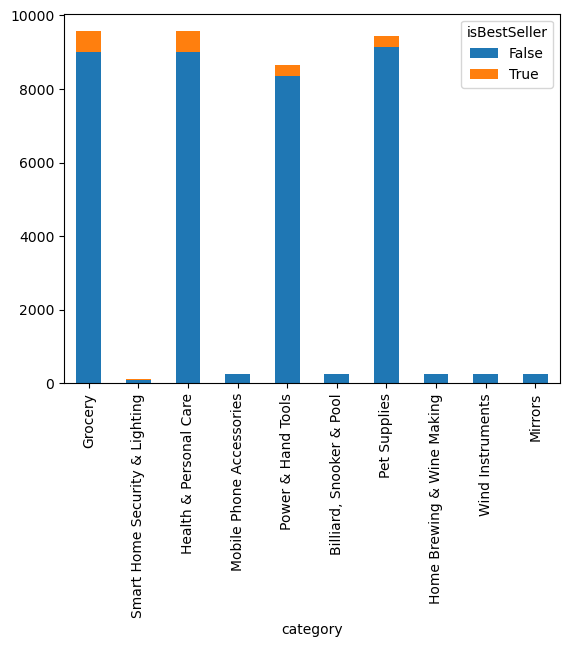

In [80]:
# parte 1.3.Hacer un grafico stacked bar chart pero seleccionar las 10 primeras categorias
# y las 2 primeras columnas
crosstab = crosstab.iloc[:10, :2]
crosstab.plot(kind='bar', stacked=True)
plt.show()

In [81]:
# lo que vemos es que los bestsellers por categorias no son algo comun, el porcentaje en bajo en todas las categorias.

In [82]:
# parte2 general
#como las diferentes categorias influencian los precos de los productos.
#necesito eliminar los outliders de la categoria precios

#calcular el rango intercuartil

Q1 = amazon['price'].quantile(0.25)
Q3 = amazon['price'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)


36.0


In [83]:
amazon[['price']].value_counts().sort_index()

price    
0.00          20
0.01         694
0.02           7
0.03           2
0.04          13
            ... 
22933.42       1
23482.73       1
24674.59       1
77752.00       1
100000.00      1
Name: count, Length: 82916, dtype: int64

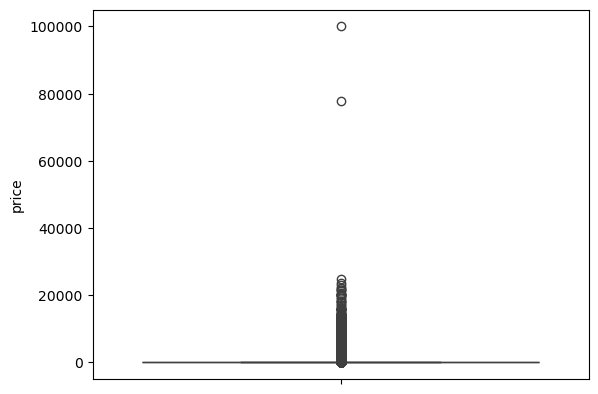

In [84]:
#quiero observar un boxplot de los precios
sns.boxplot(y=amazon['price'])
plt.show()

In [85]:
Q1

9.99

In [86]:
Q3

45.99

In [87]:
amazon.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [88]:
#eliminar los outliders
amazon = amazon[(amazon['price'] > Q1 - 1.5*IQR) & (amazon['price'] < Q3 + 1.5*IQR)]



In [89]:
amazon[['price']].value_counts().sort_index()

price
0.00       20
0.01      694
0.02        7
0.03        2
0.04       13
         ... 
99.95     489
99.96      33
99.97      47
99.98     127
99.99    3183
Name: count, Length: 10000, dtype: int64

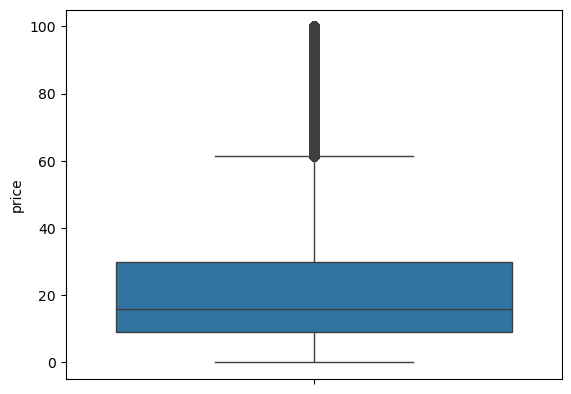

In [90]:
sns.boxplot(y=amazon['price'])
plt.show()

In [91]:
#parte 2.1
# necesito un grafico de violin para comparar los precios de los productos por categoria, filtrame las 20 primeras categorias y los precios de los productos   
amazon['category'].describe

<bound method NDFrame.describe of 0              Hi-Fi Speakers
1              Hi-Fi Speakers
2              Hi-Fi Speakers
3              Hi-Fi Speakers
4              Hi-Fi Speakers
                  ...        
2443646    Motorbike Clothing
2443647    Motorbike Clothing
2443648    Motorbike Clothing
2443649    Motorbike Clothing
2443650    Motorbike Clothing
Name: category, Length: 2115963, dtype: object>

In [110]:
#quiero un grafico de violin con las primeras 20 categorias, podes inclinar los nombres del eje x
amazon['category'].value_counts().sort_values(ascending=False).head(20)

amazon = amazon[amazon['category'].isin(amazon['category'].value_counts().sort_values(ascending=False).head(20).index)]



In [111]:
#quiero ver las categorias ordenadas por la mediana mas alta de los 20 primeros productos segun el count


amazon.groupby('category')['price'].median().sort_values(ascending=False)

category
Men                                       20.990
Fragrances                                20.000
Sports & Outdoors                         18.320
Women                                     15.990
Handmade Jewellery                        15.600
Handmade Artwork                          14.990
Birthday Gifts                            13.990
Luggage and travel gear                   13.990
Baby                                      12.990
Handmade Gifts                            12.990
Handmade Kitchen & Dining                 12.000
Skin Care                                 12.000
Handmade Home Décor                       11.990
Bath & Body                               11.635
Handmade Home & Kitchen Products          10.990
Hair Care                                  9.970
Handmade Clothing, Shoes & Accessories     8.990
Beauty                                     8.990
Manicure & Pedicure Products               7.500
Make-up                                    7.000
Name: price

In [105]:
#quiero ver las categorias ordenadas por la mediana mas alta
amazon.groupby('category')['price'].median().sort_values(ascending=False)


category
Men                                       20.990
Fragrances                                20.000
Sports & Outdoors                         18.320
Women                                     15.990
Handmade Jewellery                        15.600
Handmade Artwork                          14.990
Birthday Gifts                            13.990
Luggage and travel gear                   13.990
Baby                                      12.990
Handmade Gifts                            12.990
Handmade Kitchen & Dining                 12.000
Skin Care                                 12.000
Handmade Home Décor                       11.990
Bath & Body                               11.635
Handmade Home & Kitchen Products          10.990
Hair Care                                  9.970
Handmade Clothing, Shoes & Accessories     8.990
Beauty                                     8.990
Manicure & Pedicure Products               7.500
Make-up                                    7.000
Name: price

In [106]:
#Men y Fragances tienen la mediana mas alta de precios

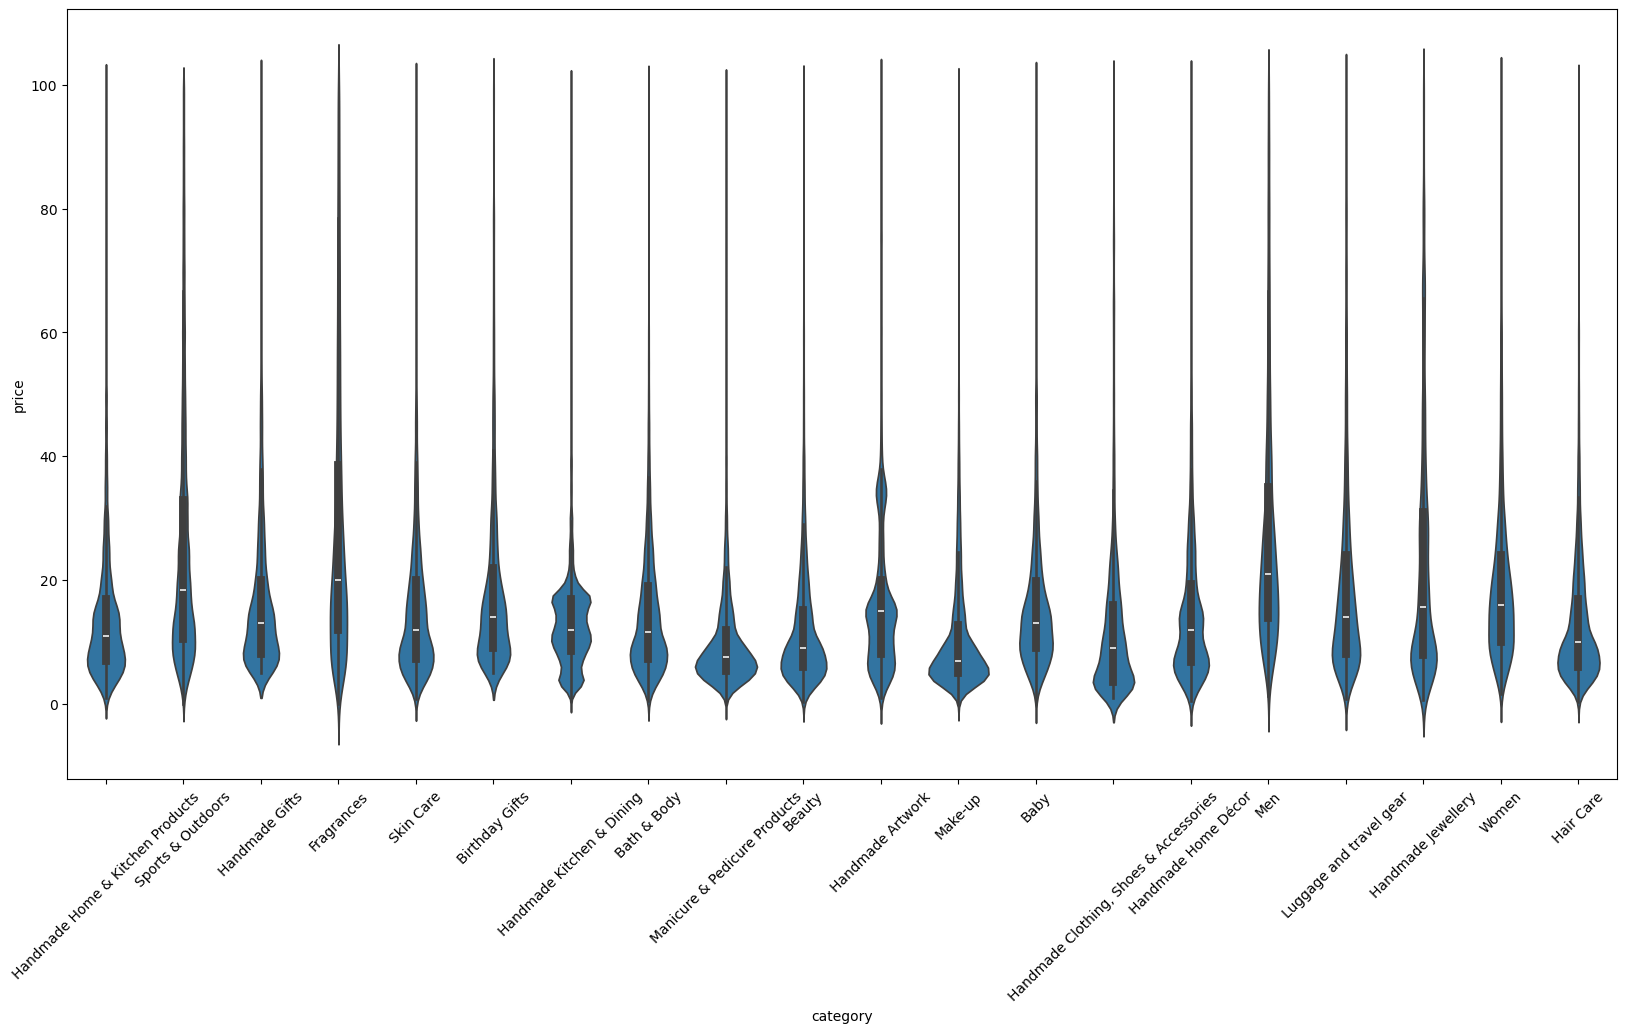

In [107]:
plt.figure(figsize=(20, 10))
sns.violinplot(x='category', y='price', data=amazon)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#la mediana mas alta de los 20 primeros productos es la de 

In [ ]:
#como se observa la mediana en un grafico de violin?
# la mediana es la linea blanca en el centro de la caja

In [93]:
#parte2.2
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count)

top_10_categories = amazon['category'].value_counts().sort_values(ascending=False).head(10).index
top_10_categories

top_10_categories_avg_price = amazon[amazon['category'].isin(top_10_categories)].groupby('category')['price'].mean().sort_values(ascending=False)
top_10_categories_avg_price

category
Sports & Outdoors                         25.172065
Birthday Gifts                            18.600195
Handmade Gifts                            17.395112
Skin Care                                 15.654722
Bath & Body                               14.678683
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Beauty                                    12.523480
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Name: price, dtype: float64

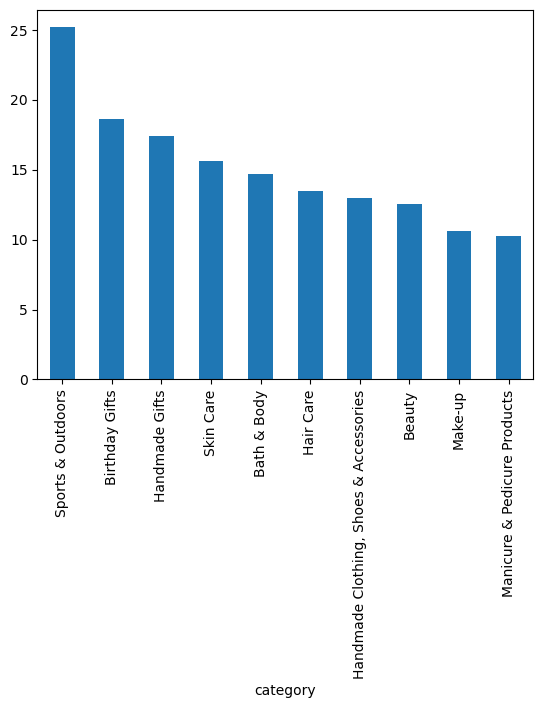

In [94]:
#bar chart
top_10_categories_avg_price.plot(kind='bar')
plt.show()

In [101]:
#sports & outdoors es la categoria con el precio promedio mas alto.

In [99]:
# Create a bar chart comparing the average price of products para todas las categories (based on count)
categories_avg_price = amazon.groupby('category')['price'].mean().sort_values(ascending=False)
categories_avg_price


category
Fragrances                                28.544912
Men                                       27.461174
Sports & Outdoors                         25.172065
Handmade Jewellery                        22.801007
Women                                     20.408735
Luggage and travel gear                   19.718228
Birthday Gifts                            18.600195
Handmade Artwork                          17.461758
Handmade Gifts                            17.395112
Baby                                      16.389799
Skin Care                                 15.654722
Handmade Home Décor                       15.413691
Bath & Body                               14.678683
Handmade Home & Kitchen Products          14.079947
Hair Care                                 13.461408
Handmade Kitchen & Dining                 13.119728
Handmade Clothing, Shoes & Accessories    12.958639
Beauty                                    12.523480
Make-up                                   10.612918
Man

In [100]:
#Fragances y Men son las categorias con los precios promedio mas altos.


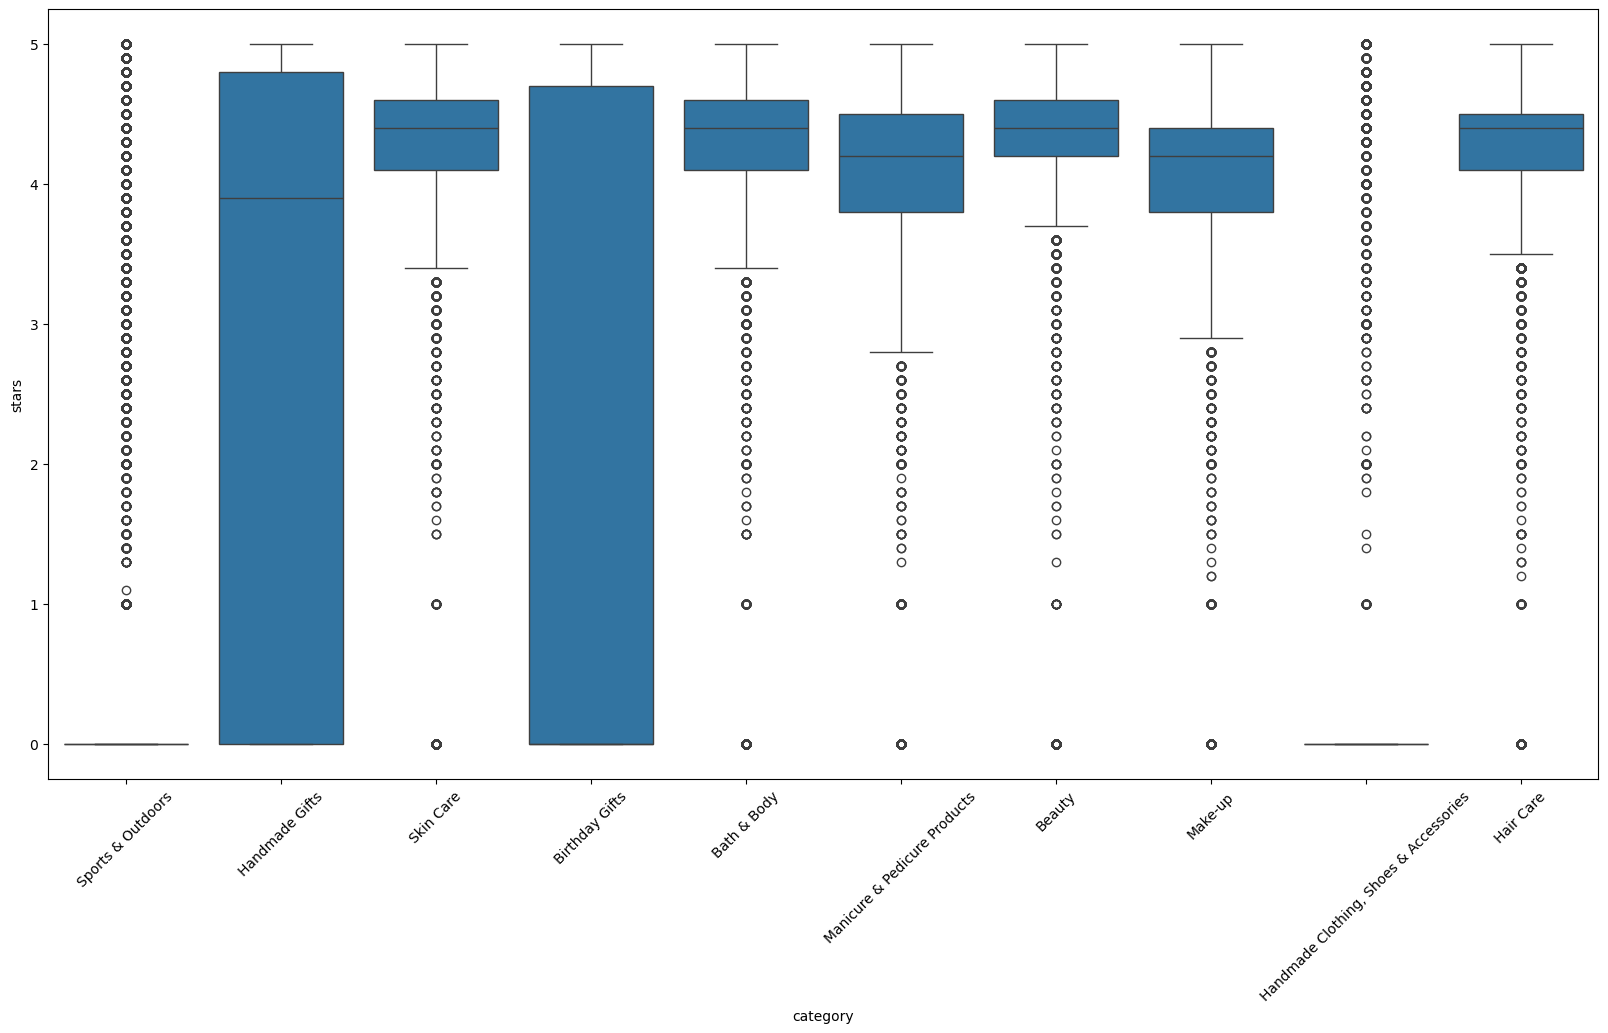

In [114]:

#part 2.3
#product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

#boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='category', y='stars', data=amazon[amazon['category'].isin(top_10_categories)])
plt.xticks(rotation=45)
plt.show()






In [115]:
#Which category tends to receive the highest median rating from customers, sin filtrar por counts
amazon.groupby('category')['stars'].median().sort_values(ascending=False)


category
Baby                                      4.5
Bath & Body                               4.4
Beauty                                    4.4
Skin Care                                 4.4
Hair Care                                 4.4
Luggage and travel gear                   4.4
Men                                       4.3
Women                                     4.3
Fragrances                                4.3
Handmade Home & Kitchen Products          4.2
Make-up                                   4.2
Manicure & Pedicure Products              4.2
Handmade Gifts                            3.9
Handmade Clothing, Shoes & Accessories    0.0
Handmade Jewellery                        0.0
Handmade Kitchen & Dining                 0.0
Handmade Artwork                          0.0
Birthday Gifts                            0.0
Sports & Outdoors                         0.0
Handmade Home Décor                       0.0
Name: stars, dtype: float64

In [117]:
#La categoria que tiene la mediana mas alta en cuanto a stars la de Bebe. ( osea los valores centrales mas altos)

In [ ]:
#parte 3.1
# - Calculate the correlation coefficient between `price` and `stars`. Quiero aplicar un pearson correlation coefficient
amazon[['price', 'stars']].corr()



,price,stars
price,1.000000,-0.018069
stars,-0.018069,1.000000


In [ ]:
#no hay una relacion lineal entre precio y ratings.

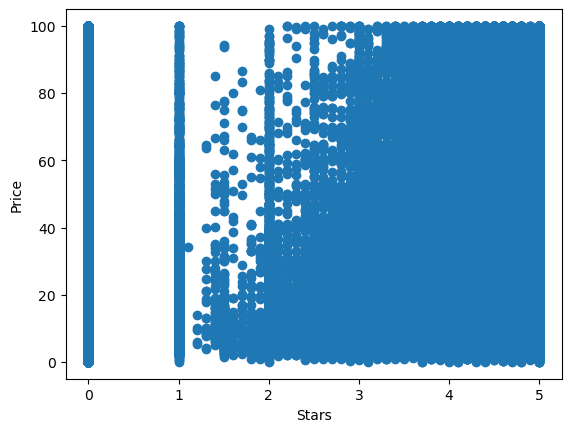

In [122]:
#realizar un scatter plot
plt.scatter(amazon['stars'], amazon['price'])
plt.xlabel('Stars')
plt.ylabel('Price')
plt.show()

In [123]:

# no hay una relacion lineal entre precio y ratings.

In [128]:
#quiero ver los diferentes dtypes de las columnas del dataset
amazon.dtypes





uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [130]:
#quiero filtrar el dataset por las columnas que son de tipo numerico
amazon.select_dtypes(include='number')
amazon_numbers = amazon.select_dtypes(include='number')


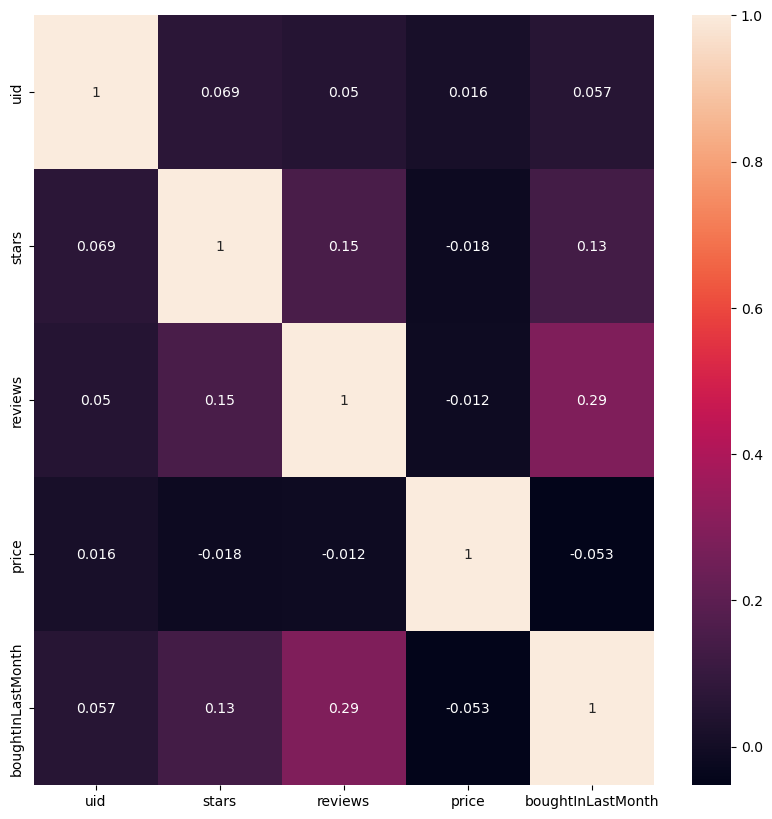

In [131]:
#quiero un heatmap de correlacion de las columnas numericas amazon_numbers
plt.figure(figsize=(10, 10))
sns.heatmap(amazon_numbers.corr(), annot=True)
plt.show()



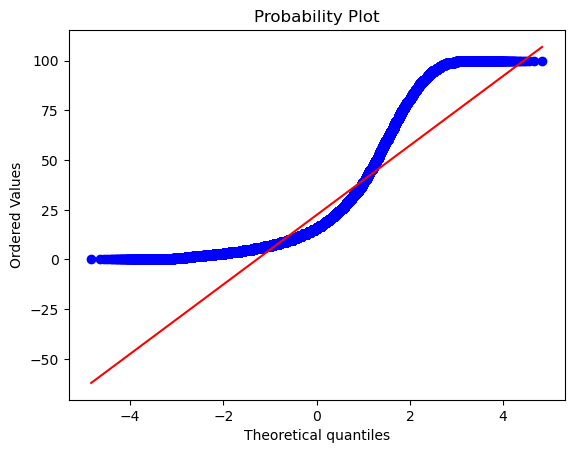

In [ ]:
#3.2
# Examine if product prices typically follow a normal distribution using a QQ plot
import scipy.stats as stats
stats.probplot(amazon['price'], dist='norm', plot=plt)
plt.show()



In [ ]:
#los precios no siguen una distribucion normal.